# Comparing Sample Distributions

This notebook contains graphs to compare the distribution of stars in the spectroscopic sample of Gaia DR2 when the distances are  
adopted frrom through the Bailer - Jones Bayesian analysis (C. A. L. Bailer-Jones et al 2018 AJ 156 58): https://iopscience.iop.org/article/10.3847/1538-3881/aacb21.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gaia_tools
from gaia_tools.data_analysis import *
from gaia_tools.import_functions import import_data
from gaia_tools import transformation_constants
from gaia_tools.data_plot import *

In [19]:
data_nonbayes = import_data("../Documents/Õppeained/Makatöö Stuff/Gaia Tools Project/Notebooks/Gaia Data/Spectroscopic_Data_With_Correlations.csv ", is_bayes = False)

Start import...
The dimensions of the data: (rows, columns) -> (7224631, 27)
Removing negative parallaxes...
Checking indexing... 



In [24]:
# The data with the Bayesian estimates

# "is_bayes = True" keeps negative parallaxes in the sample
data_bayes = import_data("Distance Bayesian Inference/Spectroscopic_Data_W_Bayesian_Estimates.csv", is_bayes = True)

Start import...
The dimensions of the data: (rows, columns) -> (7183262, 28)
Checking indexing... 



In [8]:
print("The number of stars in the sample: {0}".format(len(data)))
print("The star with largest distance: {0}".format(np.max(data.r_est)))
print("The star with smallest distance: {0}".format(np.min(data.r_est)))

The number of stars in the sample: 7183262
The star with largest distance: 29129.668855481006
The star with smallest distance: 3.2867922600989004


There are fewer stars in the Bayesian sample than in the original full spectroscopic because some stars are missing parallax measurements.

## Transforming to a galactocentric ref.

In [25]:
galcen_data = get_transformed_data(data_nonbayes, 
                                   include_cylindrical = True,
                                   debug = True, 
                                   is_source_included = True)

galcen_data_bayes = get_transformed_data(data_bayes, 
                                   include_cylindrical = True,
                                   debug = True, 
                                   is_source_included = True,
                                   is_bayes = True)

Starting galactocentric transformation loop over all data points.. 
Time elapsed for data coordinate transformation: 5.123544600000059 sec
Starting galactocentric transformation loop over all data points.. 
Time elapsed for data coordinate transformation: 5.075454600000285 sec


---
## Histograms in r

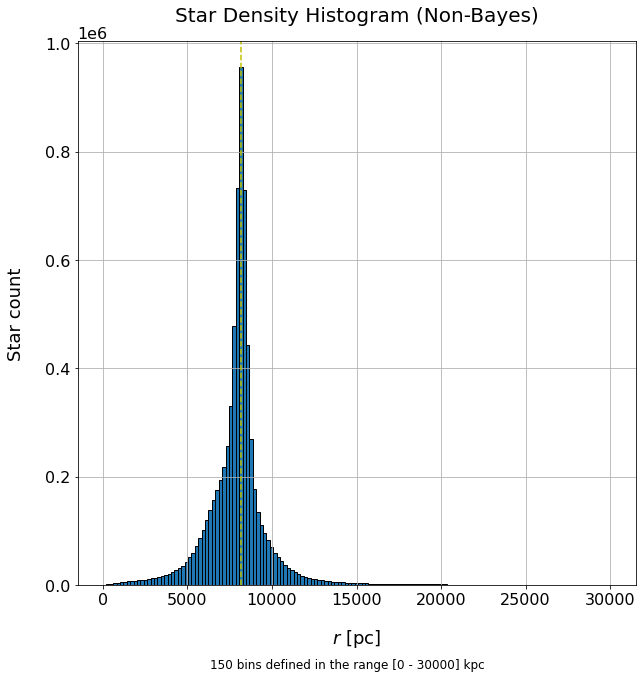

In [27]:
fig = plt.figure(figsize=(10, 10))

fig.patch.set_facecolor('white')

n_bins = 150
r_min = 0
r_max = 30000

plt.hist(galcen_data.r, bins=np.linspace(r_min, r_max, n_bins))


#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] kpc".format(n_bins, r_min, r_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.xlabel(r'$r$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

# The position of the Sun
plt.axvline(x=8178, color='y', linestyle='--')
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram (Non-Bayes)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

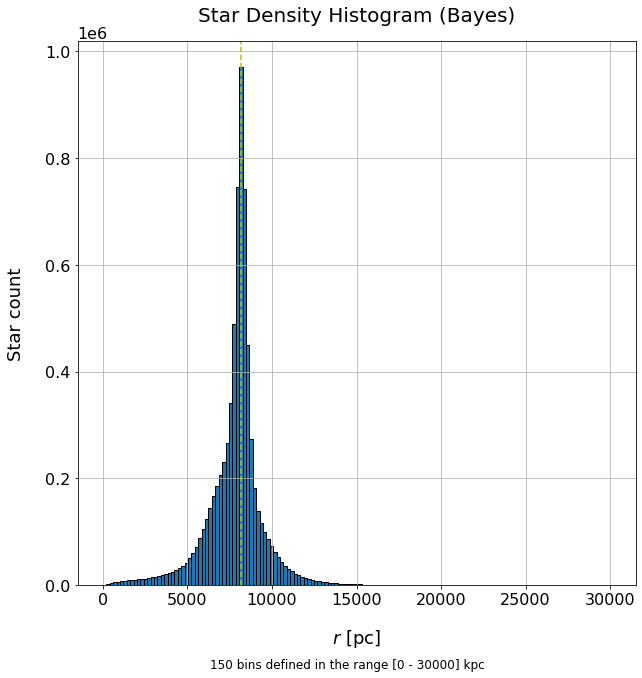

In [28]:
fig = plt.figure(figsize=(10, 10))

fig.patch.set_facecolor('white')

n_bins = 150
r_min = 0
r_max = 30000

plt.hist(galcen_data_bayes.r, bins=np.linspace(r_min, r_max, n_bins))


#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] kpc".format(n_bins, r_min, r_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.xlabel(r'$r$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

# The position of the Sun
plt.axvline(x=8178, color='y', linestyle='--')
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram (Bayes)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

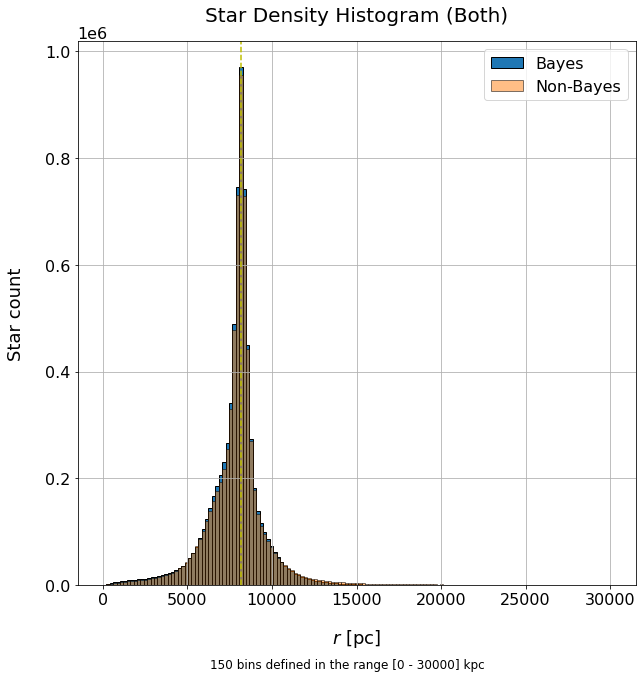

In [33]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')

n_bins = 150
r_min = 0
r_max = 30000

plt.hist(galcen_data_bayes.r, bins=np.linspace(r_min, r_max, n_bins), label='Bayes',  alpha=1)
plt.hist(galcen_data.r, bins=np.linspace(r_min, r_max, n_bins), label='Non-Bayes', alpha=0.5)

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] kpc".format(n_bins, r_min, r_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend(loc='upper right')


plt.xlabel(r'$r$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.axvline(x=8178, color='y', linestyle='--')
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram (Both)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

---
## Histograms in z

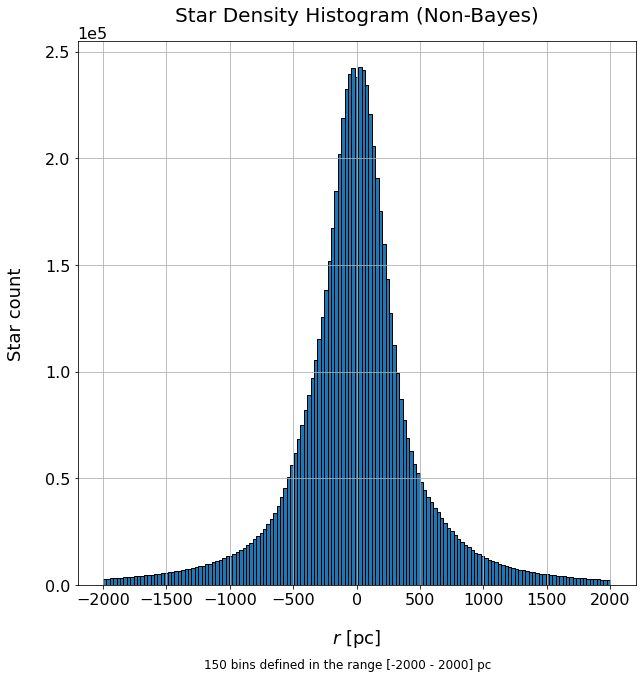

In [41]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')

n_bins = 150
z_min = -2000
z_max = 2000

plt.hist(galcen_data.z, bins=np.linspace(z_min, z_max, n_bins), label='Non-Bayes', alpha=1)

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] pc".format(n_bins, z_min, z_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.xlabel(r'$r$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram (Non-Bayes)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

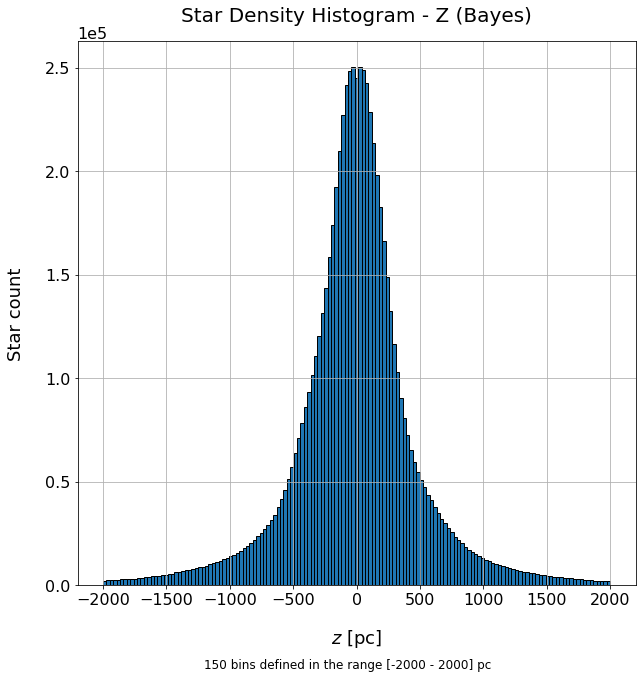

In [43]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')

n_bins = 150
z_min = -2000
z_max = 2000

plt.hist(galcen_data_bayes.z, bins=np.linspace(z_min, z_max, n_bins), label='Bayes', alpha=1)

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] pc".format(n_bins, z_min, z_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)


plt.xlabel(r'$z$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
#plt.axvline(x=8178, color='y', linestyle='--')
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram - Z (Bayes)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

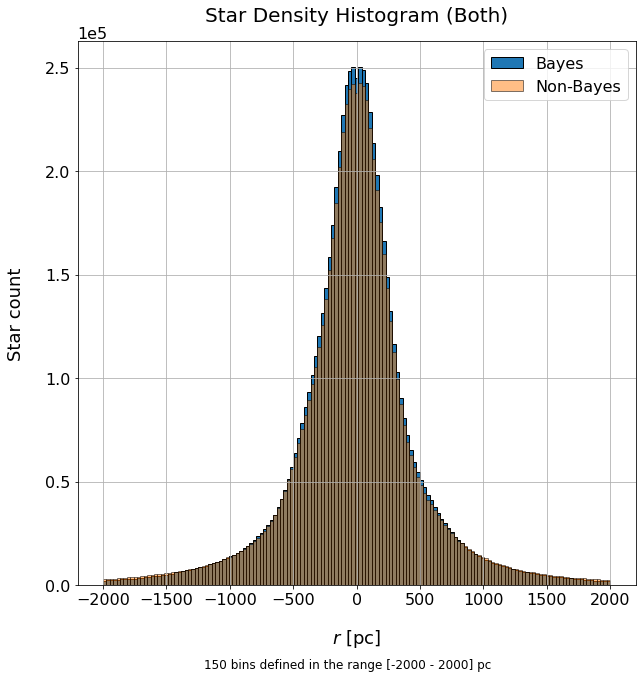

In [39]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')

n_bins = 150
z_min = -2000
z_max = 2000

plt.hist(galcen_data_bayes.z, bins=np.linspace(z_min, z_max, n_bins), label='Bayes',  alpha=1)
plt.hist(galcen_data.z, bins=np.linspace(z_min, z_max, n_bins), label='Non-Bayes', alpha=0.5)

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

txt="{0} bins defined in the range [{1} - {2}] pc".format(n_bins, z_min, z_max)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend(loc='upper right')


plt.xlabel(r'$r$ [pc]', fontdict={'fontsize': 18}, labelpad = 20);
plt.ylabel('Star count', fontdict={'fontsize': 18}, labelpad = 20);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', **{'size':'16'})
plt.title("Star Density Histogram (Both)", pad=20, fontdict={'fontsize': 20})

#plt.savefig("Star_Density_R_Presentation", dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

---
## Polar Histograms

Polar histograms depicting the distribution of data over the Galactic plane

In [73]:
def display_polar_histogram(galcen_data, n_bins=100, norm_max = 1000, r_limits = (), title = "Polar Plot"):

    from astropy.visualization.mpl_normalize import ImageNormalize
    from astropy.visualization import LogStretch

    fig= plt.figure(figsize=(10, 10), facecolor='white')
    
    # Init Data
    phi = galcen_data.phi
    r = galcen_data.r

    if not r_limits:
        min_r = np.min(galcen_data.r)
        max_r = np.max(galcen_data.r)     
    else:
        min_r = r_limits[0]
        max_r = r_limits[1]
        
    plt.ylim(min_r, max_r)
    
    # Init Bins
    rbins = np.linspace(0, max_r, n_bins)
    abins = np.linspace(-np.pi,np.pi, n_bins)

    norm_hist2d = ImageNormalize(vmin=0., vmax=norm_max, stretch=LogStretch())

    
    
    ax = fig.add_subplot(111, projection='polar')
    plt.hist2d(phi, r, bins=(abins, rbins), norm = norm_hist2d)

    plt.title(title, pad=20, fontdict={'fontsize': 20})
    
    # Set r label background color to black
    plt.setp(ax.get_yticklabels(), backgroundcolor="black")

    # Set r label font color to white
    ax.tick_params(axis="y", colors="white")

    # Configure angle labels
    ax.set_thetamin(360)
    ax.set_thetamax(0)

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Number of stars in bin')

    plt.grid()
    #plt.show()
    
    return fig


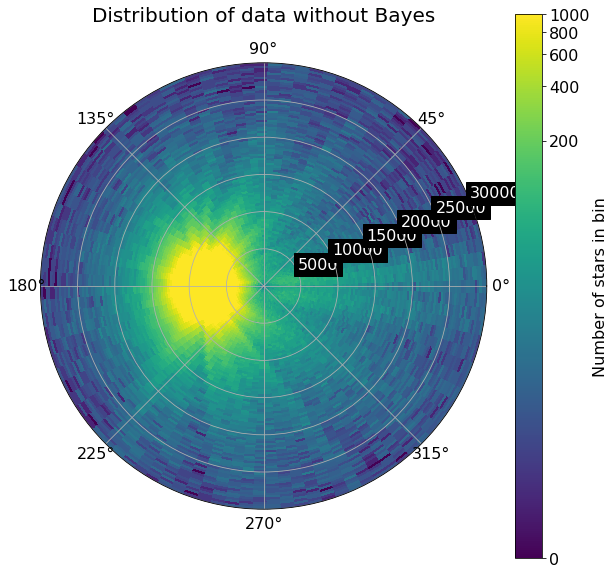

In [46]:
fig2 = display_polar_histogram(galcen_data, r_limits=(0, 30000), title = "Distribution of data without Bayes")

C:\Users\SvenP\anaconda3\lib\site-packages\gaia_tools\data_plot.py:482: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='polar')


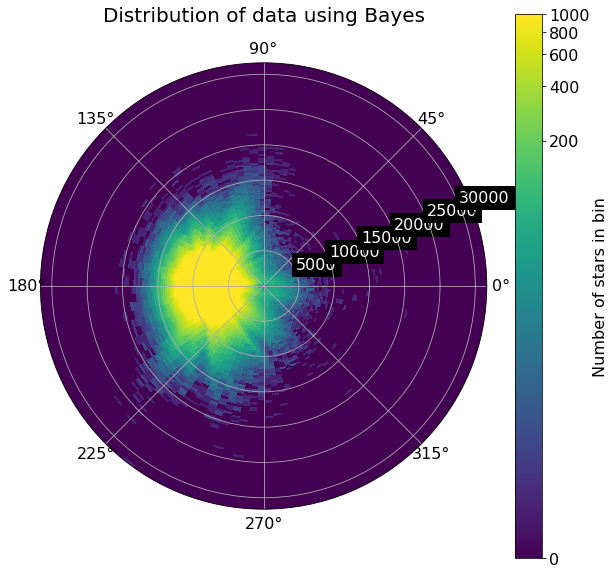

In [45]:
fig = display_polar_histogram(galcen_data_bayes, title = "Distribution of data using Bayes")

In [58]:
def point_density_histogram(galcen, vmax, bin_start = -16000, bin_end = 16000, n_bins = 200):
    
    # Check if data is in DataFrame or Astropy SkyCoords object
    if isinstance(galcen, pd.DataFrame):
        x_coord = [x for x in galcen.x]
        y_coord = [y for y in galcen.y]
    else:
        x_coord = [x for x in galcen.x.value]
        y_coord = [y for y in galcen.y.value]

    norm_hist2d = ImageNormalize(vmin=0., vmax=vmax, stretch=LogStretch())
    
    fig = plt.figure(figsize=(10, 10))
    
    plt.hist2d(x_coord, y_coord, bins=np.linspace(bin_start, bin_end, n_bins), norm = norm_hist2d)
    
    plt.plot(0, 0, markersize=15, marker ='x', color='red');
    
    plt.xlabel('x [pc]', fontsize=15)
    plt.ylabel('y [pc]', fontsize=15)
    plt.title("2D Histogram of Data Sources", pad=20, fontdict={'fontsize': 20})
    plt.xlim(bin_start, bin_end)
    plt.ylim(bin_start, bin_end)
    plt.grid()

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Number of stars in bin')

    plt.show()


## 2D Histograms

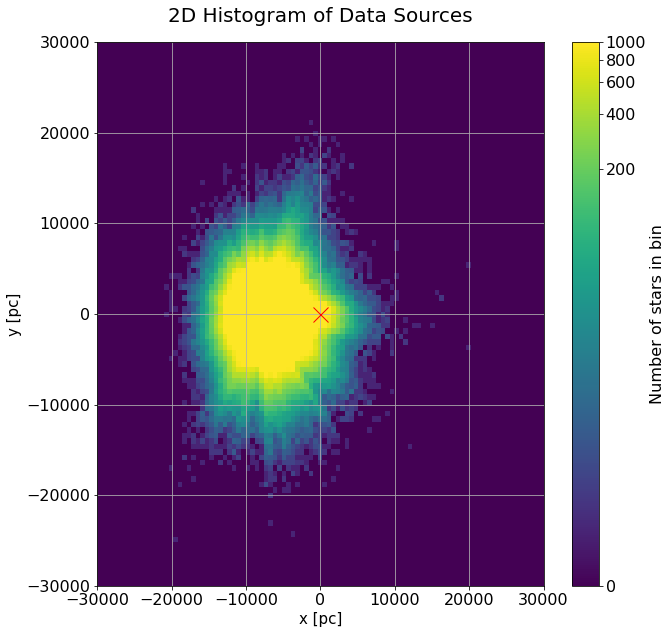

In [59]:
point_density_histogram(galcen_data_bayes, vmax=1000, bin_start = -30000, bin_end = 30000, n_bins = 100)

## Without Bayes

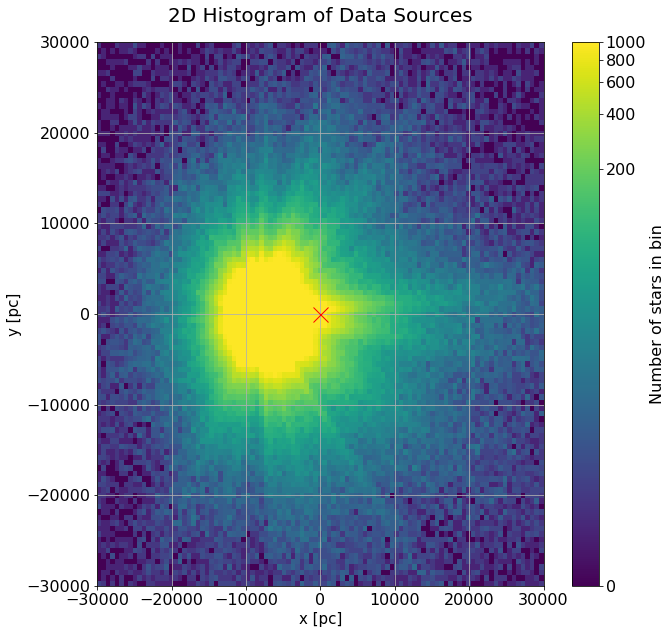

In [60]:
point_density_histogram(galcen_data, vmax=1000, bin_start = -30000, bin_end = 30000, n_bins = 100)

---